## <h2>Linear Regression with Pandas</h2>
#### Example: comparison of business models for Solar Sys companies

In [11]:
'''
TAN is the ticker for solar ETF, solar companies FSLR, RGSE SCTY the tickers for 
solar companies
'''

import datetime
import numpy as np
import pandas as pd
import pandas_datareader as data 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start = datetime.datetime(2015,7,1)
end = datetime.datetime(2016,6,1)
#only look at Close prices
df_solar = data.DataReader(['FSLR','Tan','RGSE','SCTY'],'google', start=start,end=end)['Close']

In [4]:
df_solar.head(10)

,FSLR,RGSE,SCTY,Tan
Date,,,,
2015-07-01,46.04,1128.0,52.40,38.84
2015-07-02,45.17,1200.0,52.27,38.55
2015-07-06,44.19,1008.0,51.75,36.37
2015-07-07,45.12,984.0,53.21,36.10
2015-07-08,43.27,852.0,51.48,33.67
2015-07-09,43.65,876.0,51.98,35.23
2015-07-10,44.03,942.0,53.00,36.49
2015-07-13,46.01,978.0,53.39,37.37
2015-07-14,45.81,906.0,54.26,37.86


In [5]:
# calculate the one date percent change
rets = df_solar.pct_change()

In [7]:
rets.head(10)

,FSLR,RGSE,SCTY,Tan
Date,,,,
2015-07-01,NaN,NaN,NaN,NaN
2015-07-02,-0.018897,0.063830,-0.002481,-0.007467
2015-07-06,-0.021696,-0.160000,-0.009948,-0.056550
2015-07-07,0.021045,-0.023810,0.028213,-0.007424
2015-07-08,-0.041002,-0.134146,-0.032513,-0.067313
2015-07-09,0.008782,0.028169,0.009713,0.046332
2015-07-10,0.008706,0.075342,0.019623,0.035765
2015-07-13,0.044969,0.038217,0.007358,0.024116
2015-07-14,-0.004347,-0.073620,0.016295,0.013112


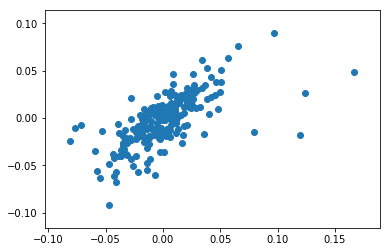

In [12]:
# we visualise the relationship between each stock and the ETF
plt.scatter(rets.FSLR,rets.Tan)

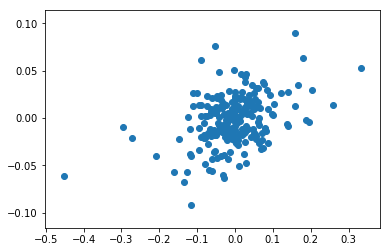

In [13]:
plt.scatter(rets.RGSE, rets.Tan)

In [14]:
# the Correlation matrix
solar_corr= rets.corr()

In [15]:
# we can see that FSLR has the closest correlation to TAN 
solar_corr

,FSLR,RGSE,SCTY,Tan
FSLR,1.000000,0.249923,0.272612,0.670114
RGSE,0.249923,1.000000,0.236604,0.389566
SCTY,0.272612,0.236604,1.000000,0.559854
Tan,0.670114,0.389566,0.559854,1.000000


## Basic risk analysis

### Rist/return trade off

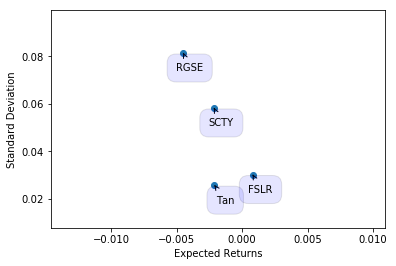

In [29]:
# to find the risk return provile, we plot the mean and std
# this plot will show that FSLR will have higher return than risk, while RGSE falls at higher risk and lower return
plt.scatter(rets.mean(),rets.std())
plt.xlabel('Expected Returns')
plt.ylabel('Standard Deviation')

for label,x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.9', fc = 'blue', alpha = 0.1),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [16]:
rets.columns

Index(['FSLR', 'RGSE', 'SCTY', 'Tan'], dtype='object')

In [19]:
rets.std()

FSLR    0.030188
RGSE    0.081405
SCTY    0.058234
Tan     0.025696
dtype: float64

## Steps for Regression Example

In [32]:
import numpy as np 
import statsmodels.api as sm
X = df_solar[['FSLR','RGSE','SCTY']]
X = sm.add_constant(X)
y = df_solar['Tan']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    Tan   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     435.1
Date:                Tue, 22 Aug 2017   Prob (F-statistic):           4.89e-94
Time:                        15:49:41   Log-Likelihood:                -464.33
No. Observations:                 232   AIC:                             936.7
Df Residuals:                     228   BIC:                             950.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2915      1.180     12.956      0.0

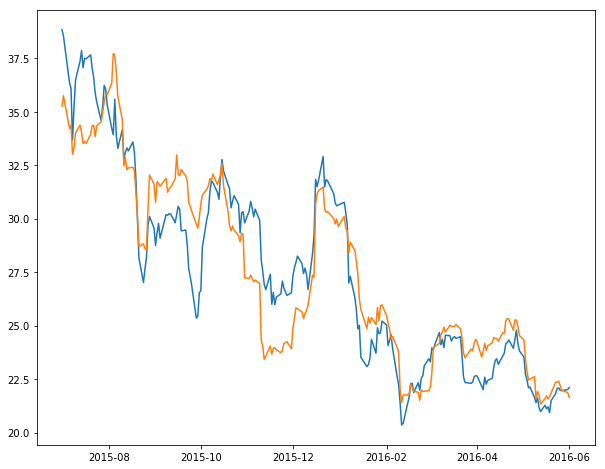

In [36]:
# plot the fitted line 
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(y)
ax.plot(result.fittedvalues)

In [37]:
df_solar.ix[2]

/Users/spydermac/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


FSLR      44.19
RGSE    1008.00
SCTY      51.75
Tan       36.37
Name: 2015-07-06 00:00:00, dtype: float64

In [38]:
data = {'nationality': ['UK', 'China', 'US', 'UK', 'Japan', 'China', 'UK', 'UK', 'Japan', 'US'],
        'age': [25, 30, 15, np.nan, 25, 22, np.nan,45 ,18, 33],
        'type': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'diabetes': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}


In [39]:
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


In [42]:
from pandas import Series, DataFrame
df = DataFrame(data,index=labels)

In [80]:
df

,age,diabetes,nationality,type
a,25.0,yes,UK,1
b,30.0,yes,China,3
c,15.0,no,US,2
d,NaN,yes,UK,3
e,25.0,no,Japan,2
f,22.0,no,China,3
g,NaN,no,UK,1
h,45.0,yes,UK,1
i,18.0,no,Japan,2
j,33.0,no,US,1


In [74]:
df.loc[df['age'].between(20,30,inclusive=True)]

,age,diabetes,nationality,type
a,25.0,yes,UK,1
b,30.0,yes,China,3
e,25.0,no,Japan,2
f,22.0,no,China,3


In [84]:
df.groupby('nationality')['age'].mean()

nationality
China    26.0
Japan    21.5
UK       35.0
US       24.0
Name: age, dtype: float64

In [100]:
df.sort_values(['age','type'],ascending=[False,True])

,age,diabetes,nationality,type
h,45.0,yes,UK,1
j,33.0,no,US,1
b,30.0,yes,China,3
a,25.0,yes,UK,1
e,25.0,no,Japan,2
f,22.0,no,China,3
i,18.0,no,Japan,2
c,15.0,no,US,2
g,NaN,no,UK,1
d,NaN,yes,UK,3


In [101]:
df['nationality']=df['nationality'].replace('US','United States')

In [102]:
df

,age,diabetes,nationality,type
c,15.0,no,United States,2
i,18.0,no,Japan,2
f,22.0,no,China,3
e,25.0,no,Japan,2
a,25.0,yes,UK,1
b,30.0,yes,China,3
j,33.0,no,United States,1
h,45.0,yes,UK,1
d,NaN,yes,UK,3
g,NaN,no,UK,1


In [50]:
data_frame_trimmed = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [51]:
data_frame_trimmed

,age,diabetes,nationality,type
a,25.0,yes,UK,1
b,30.0,yes,China,3
c,15.0,no,US,2
d,NaN,yes,UK,3
e,25.0,no,Japan,2
f,22.0,no,China,3
g,NaN,no,UK,1
h,45.0,yes,UK,1
i,18.0,no,Japan,2
j,33.0,no,US,1


In [85]:
#05w1696

In [90]:
?sort_values()

Object `sort_values` not found.
